# Лабораторная работа 3. Описательная статистика


## Ваши данные
Заполните следующую информацию:

*Имя:* Мария

*Фамилия:* Вереина

*Электронная почта:* VereinaMS@mgpu.ru



In [2]:
# imports and setup
import pandas as pd
import scipy as sc
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Часть 3.1: Индекс качества воздуха SLC

В этой задаче изучить качество воздуха в Солт-Лейк-Сити.

### Задача 3.1.0. Узнайте об AQI

Прочтите об [индексе качества воздуха (AQI)](https://www.airnow.gov/aqi/aqi-basics) и
Система [AirNow](https://www.airnow.gov/about-airnow).


### Задача 3.1.1. Скачать данные
Агентство по охране окружающей среды предоставляет доступ к данным о качестве воздуха на веб-сайте AirData. Прочтите о данных, доступных на [этой информационной странице] (https://www.epa.gov/outdoor-air-quality-data/air-data-basic-information). Или скачайте файл `ad_viz_plotval_data.csv` в каталоге задания.


Перейдите на [website] (https://www.epa.gov/outdoor-air-quality-data/download-daily-data) и загрузите следующие ежедневные данные:

+ Pollutant = PM2.5
+ Year = 2023
+ City = Salt Lake City, UT
+ Monitor Site = All Sites

### Задача 3.1.2. Импорт данных. Предобработка данных
Используйте функцию `pandas.read_csv()` для импорта данных.

Предупреждение: эти данные не соответствуют критериям качетсва:

+ Даты не сортируются.
+ Некоторые даты могут иметь пропущенные значения.
+ Некоторые даты могут иметь несколько значений, соответствующих разным датчикам (POC=1,2,3,4,5).

In [3]:
from google.colab import files
albums = files.upload()

Saving ad_viz_plotval_data.csv to ad_viz_plotval_data.csv


In [4]:
# читаем файл с помощью pandas
aqi_data = pd.read_csv("ad_viz_plotval_data.csv")
aqi_data.head()

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2023,AQS,490352005,1,4.6,ug/m3 LC,19,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
1,01/02/2023,AQS,490352005,1,4.0,ug/m3 LC,17,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
2,01/03/2023,AQS,490352005,1,12.5,ug/m3 LC,52,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
3,01/04/2023,AQS,490352005,1,9.9,ug/m3 LC,41,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
4,01/05/2023,AQS,490352005,1,2.2,ug/m3 LC,9,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167


In [8]:
# считаем сколько строк и столбцов в датасете
aqi_data.shape

(6514, 20)

In [10]:
# изучаем типы данных датасета
aqi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6514 entries, 0 to 6513
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            6514 non-null   object 
 1   Source                          6514 non-null   object 
 2   Site ID                         6514 non-null   int64  
 3   POC                             6514 non-null   int64  
 4   Daily Mean PM2.5 Concentration  6514 non-null   float64
 5   UNITS                           6514 non-null   object 
 6   DAILY_AQI_VALUE                 6514 non-null   int64  
 7   Site Name                       6514 non-null   object 
 8   DAILY_OBS_COUNT                 6514 non-null   int64  
 9   PERCENT_COMPLETE                6514 non-null   float64
 10  AQS_PARAMETER_CODE              6514 non-null   int64  
 11  AQS_PARAMETER_DESC              6514 non-null   object 
 12  CBSA_CODE                       65

In [11]:
# необходимо перевести столбец даты в тип данных - "Дата"
aqi_data['Date'] = pd.to_datetime(aqi_data['Date'])

In [30]:
# проверяем корректность изменений
aqi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6514 entries, 0 to 6513
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            6514 non-null   datetime64[ns]
 1   Source                          6514 non-null   object        
 2   Site ID                         6514 non-null   int64         
 3   POC                             6514 non-null   int64         
 4   Daily Mean PM2.5 Concentration  6514 non-null   float64       
 5   UNITS                           6514 non-null   object        
 6   DAILY_AQI_VALUE                 6514 non-null   int64         
 7   Site Name                       6514 non-null   object        
 8   DAILY_OBS_COUNT                 6514 non-null   int64         
 9   PERCENT_COMPLETE                6514 non-null   float64       
 10  AQS_PARAMETER_CODE              6514 non-null   int64         
 11  AQS_

In [14]:
# отбираем интересующие колонки для проведения обзорной статистики
selected = aqi_data[['Daily Mean PM2.5 Concentration', 'DAILY_AQI_VALUE']]
stat = selected.describe()
stat

,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE
count,6514.000000,6514.000000
mean,7.243921,28.064784
std,6.279512,19.298589
min,-0.500000,0.000000
25%,3.800000,16.000000
50%,5.700000,24.000000
75%,7.900000,33.000000
max,52.600000,143.000000


Вывод по обзорной статистике:

- разница среднего и медианы больших различий не имеет

- сравнение стандартного отклонения со средним значением датафрейма:

**PM2.5 Concentration:** Значение среднего - 7.24, значение стандартного отклонения - 6.28 Это говорит о том, что данные в основном сосредоточены вокруг среднего значения и имеют небольшой разброс.

**AQI_VALUE:** Значение среднего равно 28.1, значение стандартного отклонения равно 19.3. Это означает, что большинство значений близки к среднему значению, но некоторые из них могут быть значительно выше или ниже.


Для определения выбросов в датафрейме pandas можно использовать метод isna(). Этот метод проверяет, есть ли в столбце пропущенные значения (NaN). Если в столбце есть пропущенные значения, то на него необходимо обратить внимание.

In [27]:
# Проверяем, есть ли выбросы
print(aqi_data.isna().sum())

Date                              0
Source                            0
Site ID                           0
POC                               0
Daily Mean PM2.5 Concentration    0
UNITS                             0
DAILY_AQI_VALUE                   0
Site Name                         0
DAILY_OBS_COUNT                   0
PERCENT_COMPLETE                  0
AQS_PARAMETER_CODE                0
AQS_PARAMETER_DESC                0
CBSA_CODE                         0
CBSA_NAME                         0
STATE_CODE                        0
STATE                             0
COUNTY_CODE                       0
COUNTY                            0
SITE_LATITUDE                     0
SITE_LONGITUDE                    0
dtype: int64


In [29]:
# сортируем дату по возрастанию
sort_aqi = aqi_data.sort_values('Date', ignore_index=True)
sort_aqi.head()

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,2023-01-01,AQS,490352005,1,4.6,ug/m3 LC,19,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
1,2023-01-01,AQS,490353015,3,2.8,ug/m3 LC,12,Utah Technical Center,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.777145,-111.945849
2,2023-01-01,AQS,490353016,1,0.8,ug/m3 LC,3,Inland Port,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.807897,-112.087717
3,2023-01-01,AQS,490353015,1,3.5,ug/m3 LC,15,Utah Technical Center,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.777145,-111.945849
4,2023-01-01,AQS,490353006,2,6.8,ug/m3 LC,28,Hawthorne,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.736389,-111.872222


### Задача 3.1.3. Визуализация данные

1. Данные содержат несколько записей о концентрации PM2,5 и AQI на одну и ту же дату, измеренных на разных объектах и с помощью разных датчиков (POCS). Постройте средние значения PM2,5 и AQI относительно даты на одном графике. Все, кто анализирует график, должен уметь определять: какова средняя концентрация PM 2,5 или значение AQI на конкретную дату.


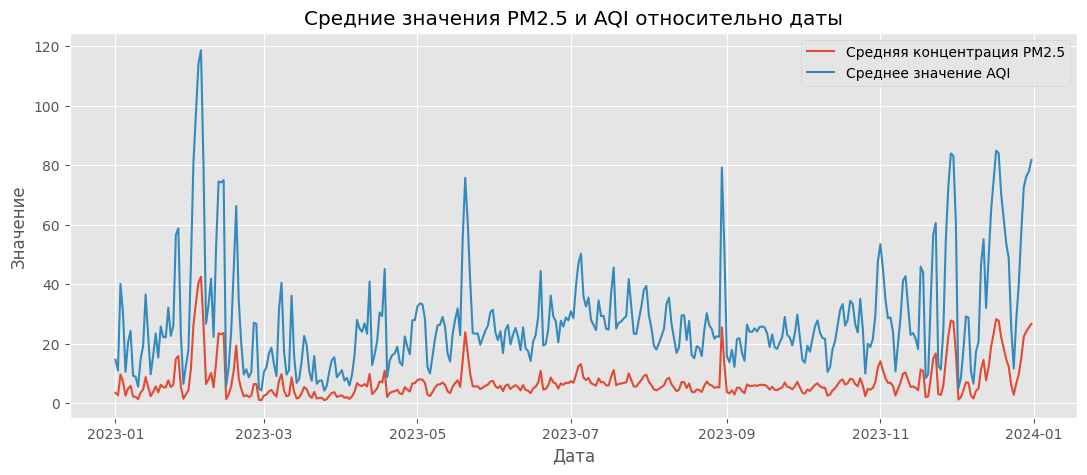

In [33]:
# Группировка данных по дате и расчет средних значений для PM2,5 и AQI
group_aqi = sort_aqi.groupby('Date')[['Daily Mean PM2.5 Concentration', 'DAILY_AQI_VALUE']].mean().reset_index()

# Построение графика
plt.figure(figsize=(13, 5))

plt.plot(group_aqi['Date'], group_aqi['Daily Mean PM2.5 Concentration'], label='Средняя концентрация PM2.5')
plt.plot(group_aqi['Date'], group_aqi['DAILY_AQI_VALUE'], label='Среднее значение AQI')

plt.title('Средние значения PM2.5 и AQI относительно даты')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

Вывод, который можно сделать по построенному графику: средние значения PM2.5 и AQI напрямую связаны. Чем выше значения AQI - тем выше концентрация PM2.5, и наоборот.

Ниже проведем сравнение максимальных значений AQI и концентрации PM2.5 по каждому месяцу для сравнения наиболее высоких значений на графике. По результатам сортировки видно, что максимальные значения в обоих случаях наблюдаются в феврале, декабре и ноябре. Можно было бы сделать вывод, что максимальные значения наблюдаются в холодное время года, однако довольно высокие значения наблюдаются и в августе, мае, июле - это говорит о том, что нельзя выявить сезонность для текущего набора данных.

In [52]:
sort_aqi["Date"] = pd.to_datetime(sort_aqi["Date"], format="%m/%d/%Y")

# группировка данных по месяцам
resampled = sort_aqi.resample("M", on="Date")

# найти максимальное значение в каждой группе
result = resampled['DAILY_AQI_VALUE'].max()
result.sort_values(ascending=False)

Date
2023-02-28    143
2023-12-31    100
2023-11-30     98
2023-08-31     89
2023-05-31     81
2023-07-31     78
2023-10-31     75
2023-01-31     66
2023-04-30     56
2023-06-30     55
2023-03-31     53
2023-09-30     45
Name: DAILY_AQI_VALUE, dtype: int64

In [53]:
sort_aqi["Date"] = pd.to_datetime(sort_aqi["Date"], format="%m/%d/%Y")

# группировка данных по месяцам
resampled = sort_aqi.resample("M", on="Date")

# найти максимальное значение в каждой группе
result = resampled['Daily Mean PM2.5 Concentration'].max()
result.sort_values(ascending=False)

Date
2023-02-28    52.6
2023-12-31    35.4
2023-11-30    34.6
2023-08-31    30.2
2023-05-31    26.4
2023-07-31    24.9
2023-10-31    23.5
2023-01-31    19.1
2023-04-30    14.5
2023-06-30    14.1
2023-03-31    13.1
2023-09-30    10.8
Name: Daily Mean PM2.5 Concentration, dtype: float64

2. Постройте график зависимости средней концентрации PM 2,5 от даты для двух разных участков (идентификаторы участков — 490352005 и 490353015). Обратите внимание, что в этом случае среднее значение берется по POC. Резудбьтаты для обоих участков должны быть на одном рисунке.
*Подсказка*: использовать функцию `pandas groupby`.

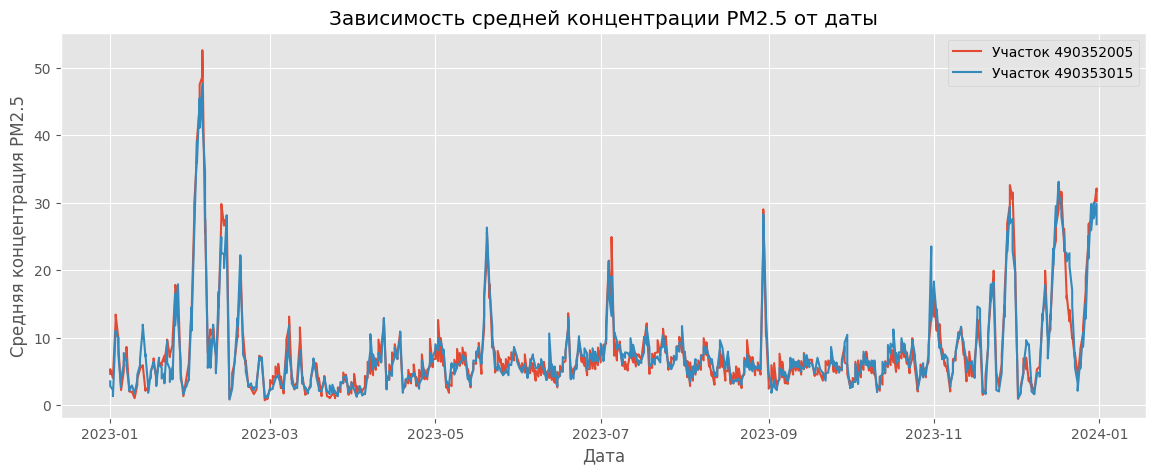

In [54]:
# Группировка данных по дате, идентификатору участка и POC, а затем подсчет среднего значения PM2,5
grouped_aqi = sort_aqi.groupby(['Date', 'Site ID', 'POC'])['Daily Mean PM2.5 Concentration'].mean().reset_index()

# Фильтрация данных для двух участков
id_first = grouped_aqi[grouped_aqi['Site ID'] == 490352005]
id_second = grouped_aqi[grouped_aqi['Site ID'] == 490353015]

# Построение графика
plt.figure(figsize=(14, 5))
plt.plot(id_first['Date'], id_first['Daily Mean PM2.5 Concentration'], label='Участок 490352005')
plt.plot(id_second['Date'], id_second['Daily Mean PM2.5 Concentration'], label='Участок 490353015')

plt.title('Зависимость средней концентрации PM2.5 от даты')
plt.xlabel('Дата')
plt.ylabel('Средняя концентрация PM2.5')
plt.legend()
plt.show()

Вывод, который можно сделать по этому графику: значения обоих участков практически одинаковы, различия несущественны. Это объяснимо тем, что берутся данные одного города.

### Задача 3.1.4. Постройте скользящее среднее

Постройте график с дневным значением AQI и скользящим средним для дневного значения AQI. Используйте дневное значение AQI, усредненное по сайтам и POC. Поэкспериментируйте с разными временными диапазонами, чтобы найти наиболее подходящее.

*Подсказка:* Используйте `rolling()`.

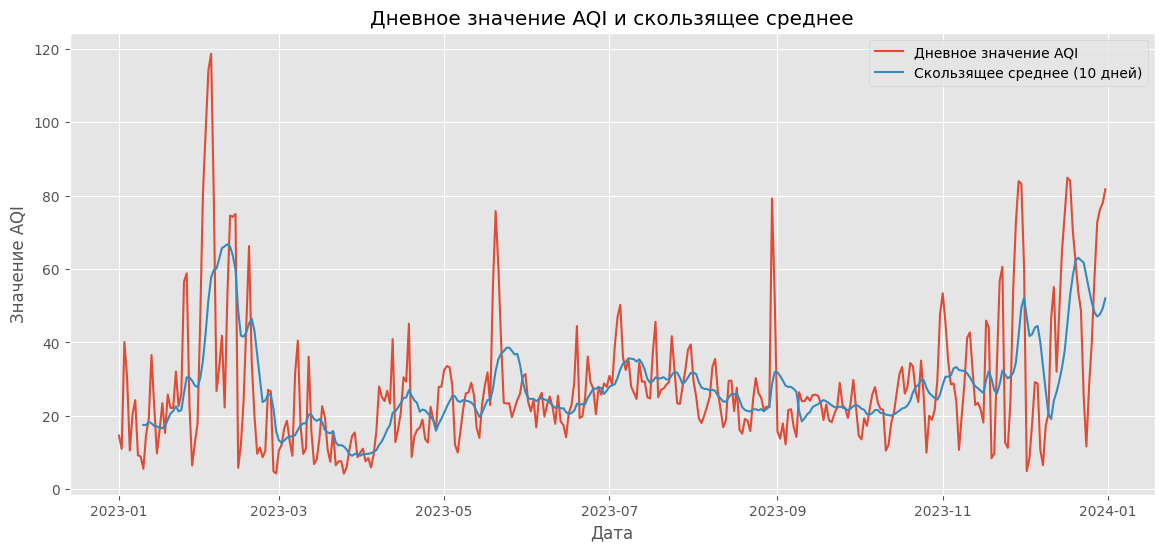

In [57]:
# группируем данные по дате, участкам и POC, расчитаем среднее значение AQI
sk_sr = sort_aqi.groupby(['Date', 'Site ID', 'POC'])['DAILY_AQI_VALUE'].mean().reset_index()

# вычислим среднее дневных значений AQI
mean_aqi = sk_sr.groupby('Date')['DAILY_AQI_VALUE'].mean().reset_index()

# вычисление скользящего среднего для дневного значения AQI
skolz_sr = mean_aqi['DAILY_AQI_VALUE'].rolling(10).mean()

# строим график
plt.figure(figsize=(14, 6))

plt.plot(mean_aqi['Date'], mean_aqi['DAILY_AQI_VALUE'], label='Дневное значение AQI')
plt.plot(mean_aqi['Date'], skolz_sr, label='Скользящее среднее (10 дней)')

plt.title('Дневное значение AQI и скользящее среднее')
plt.xlabel('Дата')
plt.ylabel('Значение AQI')
plt.legend()
plt.grid(True)
plt.show()

## Часть 3.2. A/B-тестирование

Сначала прочитайте статью WIRED об A/B-тестировании [здесь] (http://www.wired.com/2012/04/ff_abtesting/).

Предположим, ваша компания разрабатывает новый логотип. Художественный отдел разрабатывает два логотипа: ‘Logo A’ и ‘Logo B’, показанные ниже.
![](http://www.wired.com/wiredenterprise/wp-content/gallery/20-05/ff_abtesting_f.jpg)

Ваша задача — выяснить, какой логотип лучше.


Вы решаете провести следующий эксперимент. Вы используете рекламу Google, чтобы купить 6000 рекламных объявлений. В $N_A=3000$ объявлений (выбранных случайно) вы используете логотип А, а в остальных $N_B=3000$ объявлениях вы используете логотип Б. Затем вы видите, какой логотип привлекает больше кликов.

Оказывается, $n_A=800$ зрителей с логотипом A нажимают на рекламу, а $n_B=1000$ зрителей с логотипом B нажимают на рекламу. Очевидно, что логотип B показал лучшие результаты в этом тесте, но достаточно ли разница, чтобы сказать, что логотип B лучше? Или, возможно, ‘Logo B’ просто повезло в этом тесте?

Целью этого упражнения будет проведение двухпропорционального z-теста, чтобы определить, лучше ли ‘Logo B’. Шаги будут аналогичны шагам, использованным в эксперименте Солка с полиовакциной в 1954 году (1954 Salk polio-vaccine experiment).


### Задача 3.2.1. Сформулируйте нулевую гипотезу

Пусть $p_A = n_A/N_A$ — доля кликов по логотипу A, и аналогично $p_B$ — доля кликов по логотипу B. В терминах $p_A$ и $p_B$ четко сформулируйте нулевую и альтернативную гипотезы.

**Ваше решение:**

Сформулируем нулевую гипотезу о том, что
$$
H_0\colon p_A = p_B,
$$
то есть доли кликов благодаря лого А и лого В равноценны, одинаково привлекая к нажатию на рекламу
$$
H_a\colon p_A != p_B,
$$
то есть лого А и лого В привлекают к нажатию на рекламу с разной вероятностью.


Мы выбираем уровень значимости $\alpha = 0,01$.

Был проведен эксперимент со следующими результатами:
$$
\begin{aligned}
&\text{Лого А:} \quad N_A = 3,000, \quad n_A = 800 \\
&\text{Лого В:} \quad N_B = 3,000, \quad n_B = 1,000.
\end{aligned}
$$

Теперь мы выполняем проверку гипотезы и смотрим, какова вероятность результата при предположении о нулевой гипотезе.

### Задача 2.2. Найдите двухпропорциональное z-значение

Предполагая нулевую гипотезу, мы знаем, что статистика, называемая *двухпропорциональным z-значением*,
$$
Z = \frac{p_A - p_B}{\sqrt{\hat{p} \hat{q} \left( \frac{1}{N_A} + \frac{1}{N_B} \right)}}.
$$
приблизительно распределяется в соответствии со стандартным нормальным распределением. Здесь $\hat{p} = \frac{N_A}{N_A + N_B}p_A + \frac{N_B}{N_A + N_B}p_B$ и $\hat{q} = 1-\hat{p}$.


Найдите двухпропорциональное z-значение.

Для начала найдём доли нажатий на рекламу для каждого логотипа:

In [83]:
NA = 3000
NB = 3000
# Доля нажатий на объявления с логотипом A:
pA = 800/3000
# Доля нажатий на объявления с логотипом B:
pB = 1000/3000
# Теперь найдём среднее значение этих долей и стандартное отклонение:
# Среднее значение:
p_ = (NA*pA + NB*pB)/(NA + NB)
# Стандартное отклонение:
σ = np.sqrt(p_*(1 - p_)*(1/NA + 1/NB))

print('pA:', pA, '\n', 'pB:', pB, '\n', 'p_:', p_, '\n', 'σ:', σ)

pA: 0.26666666666666666 
 pB: 0.3333333333333333 
 p_: 0.3 
 σ: 0.011832159566199232


Найдем двухпропорциональное z-значение согласно выше приведенной формуле

In [78]:
z = (pA - pB) / σ
print(z)

-5.6343616981901095


### Задача 2.3. Завершите z-тест двух пропорций

Найдите значение $p$ для проверки гипотезы. Сначала, используя обычную функцию `cdf`, а затем проверьте свой ответ, запустив z-тест двух пропорций в Python с помощью  `proportions_ztest`.

In [84]:
print("p-значение:", 1 - norm.cdf(z, loc=0, scale=1))

p-значение: 0.9999999912146049


In [86]:
from statsmodels.stats.proportion import proportions_ztest

counts = [800, 1000]
sample_sizes = [3000, 3000]
z, pval = proportions_ztest(counts, sample_sizes,alternative='larger')
#alternative: 'two-sided', 'smaller', or 'larger'
print(z, pval)

-5.6343616981901095 0.9999999912146049


Если p-значение меньше заданного уровня значимости (0.01), то мы отклоняем нулевую гипотезу, в противном случае мы ее сохраняем.

Поскольку p-значение очень близко к 1, мы не можем отвергнуть нулевую гипотезу. Это означает, что у нас нет достаточно доказательств, чтобы сказать, что доли кликов по двум логотипам отличаются.

Помимо этого, мы вычислили z-значение, которое показывает, насколько результаты наблюдений отклоняются от нулевой гипотезы в пользу альтернативной гипотезы. Если z-значение невелико, мы сохраняем нулевую гипотезу.